## Observations and Insights 

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_combined_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_combined_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [123]:
# Checking the number of mice.
number_of_mice_df = study_combined_complete.groupby("Mouse ID")["Mouse ID"].nunique()
number_of_mice_df = number_of_mice_df.count()
number_of_mice_df 

249

In [124]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id_df = study_combined_complete[study_combined_complete.duplicated(['Mouse ID'], keep=False)]
duplicate_mouse_id_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [125]:
# Optional: Get all the data for the duplicate mouse ID. 



In [126]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_dupes_df = study_combined_complete.drop_duplicates(subset=['Mouse ID'])
dropped_dupes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [127]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice_df = dropped_dupes_df.groupby("Mouse ID")["Mouse ID"].nunique()
clean_number_of_mice_df = clean_number_of_mice_df.count()
clean_number_of_mice_df

249

## Summary Statistics

In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_tumor_vol_by_regimen_df = study_combined_complete.groupby('Tumor Volume (mm3)')['Drug Regimen']
stats_tumor_vol_by_regimen_df.describe()
stats_tumor_vol_by_regimen_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
stats_of_drug_regimen_df = study_combined_complete.groupby('Drug Regimen')['Drug Regimen'].describe()
stats_of_drug_regimen_df

#Assemble the resulting series into a single summary dataframe.



,count,unique,top,freq
Drug Regimen,,,,
Capomulin,230,1,Capomulin,230
Ceftamin,178,1,Ceftamin,178
Infubinol,178,1,Infubinol,178
Ketapril,188,1,Ketapril,188
Naftisol,186,1,Naftisol,186
Placebo,181,1,Placebo,181
Propriva,161,1,Propriva,161
Ramicane,228,1,Ramicane,228
Stelasyn,181,1,Stelasyn,181


In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

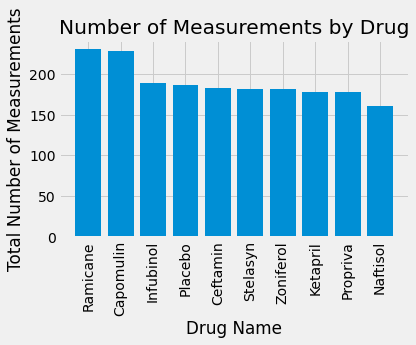

In [130]:
#style
plt.style.use("fivethirtyeight")

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#x axis
x_axis = study_combined_complete['Drug Regimen'].unique()

plt.title("Number of Measurements by Drug")

plt.xlabel("Drug Name")

#y axis
y_axis = study_combined_complete['Drug Regimen'].value_counts()

plt.ylabel("Total Number of Measurements")

plt.bar(x_axis, y_axis)

plt.tight_layout()

#ticks and rotation
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = "vertical")


plt.show()





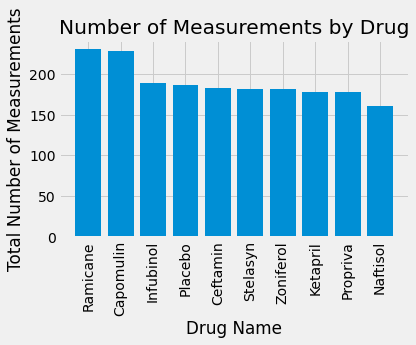

In [265]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#style
plt.style.use("fivethirtyeight")

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#x axis
x_axis = study_combined_complete['Drug Regimen'].unique()

plt.title("Number of Measurements by Drug")

plt.xlabel("Drug Name")

#y axis
y_axis = study_combined_complete['Drug Regimen'].value_counts()

plt.ylabel("Total Number of Measurements")

plt.bar(x_axis, y_axis)

plt.tight_layout()

#ticks and rotation
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = "vertical")


plt.show()




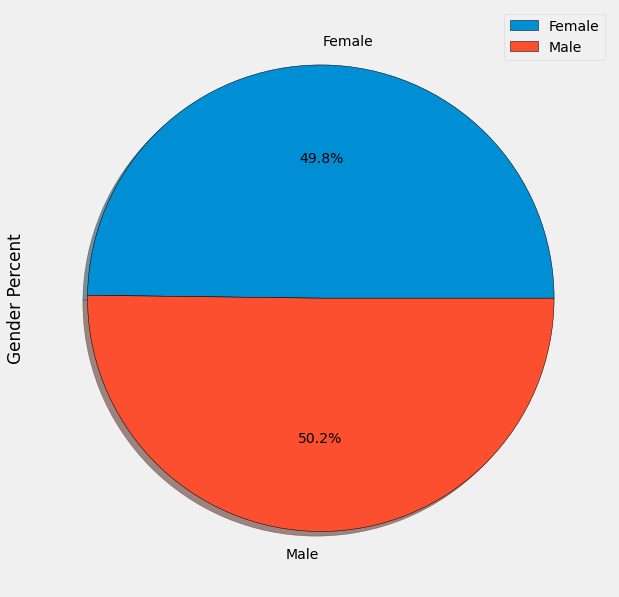

In [310]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender_df = study_combined_complete.groupby("Sex")["Mouse ID"].nunique()
groupby_gender_df

#total mice
total_study = study_combined_complete.groupby(["Mouse ID","Sex"])
total_mice = len(total_study)
total_mice

#percentage of mouse
mice_percent = (groupby_gender_df/(total_mice))*100
mice_percent = mice_percent.round(2)
mice_percent

#summary df
mice_summary_df = pd.DataFrame({"Gender Percent":mice_percent})
mice_summary_df

plot = mice_summary_df.plot(kind='pie', y='Gender Percent', figsize=(15, 10),autopct='%1.1f%%', shadow = True, wedgeprops = {'edgecolor':'black'})





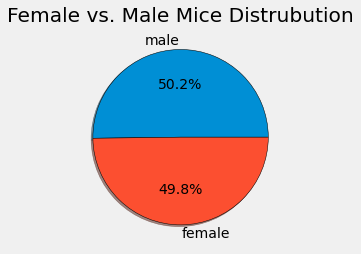

In [313]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender_df = study_combined_complete.groupby("Sex")["Mouse ID"].nunique()
groupby_gender_df

#total mice
total_study = study_combined_complete.groupby(["Mouse ID","Sex"])
total_mice = len(total_study)
total_mice

#percentage of mouse
mice_percent = (groupby_gender_df/(total_mice))*100
mice_percent = mice_percent.round(2)
mice_percent

#summary df
mice_summary_df = pd.DataFrame({"Gender Percent":mice_percent})
mice_summary_df

#pie plot style
#plt.style.use("fivethirtyeight")
plt.style.use("fivethirtyeight")

values = ['50.2','49.8']
labels = ['male', 'female']
explode = [0.01,0.01]

plt.title("Female vs. Male Mice Distrubution")
plt.tight_layout()
plt.pie(values,labels = labels, autopct='%1.1f%%', shadow = True, wedgeprops = {'edgecolor':'black'})
plt.show()








## Quartiles, Outliers and Boxplots

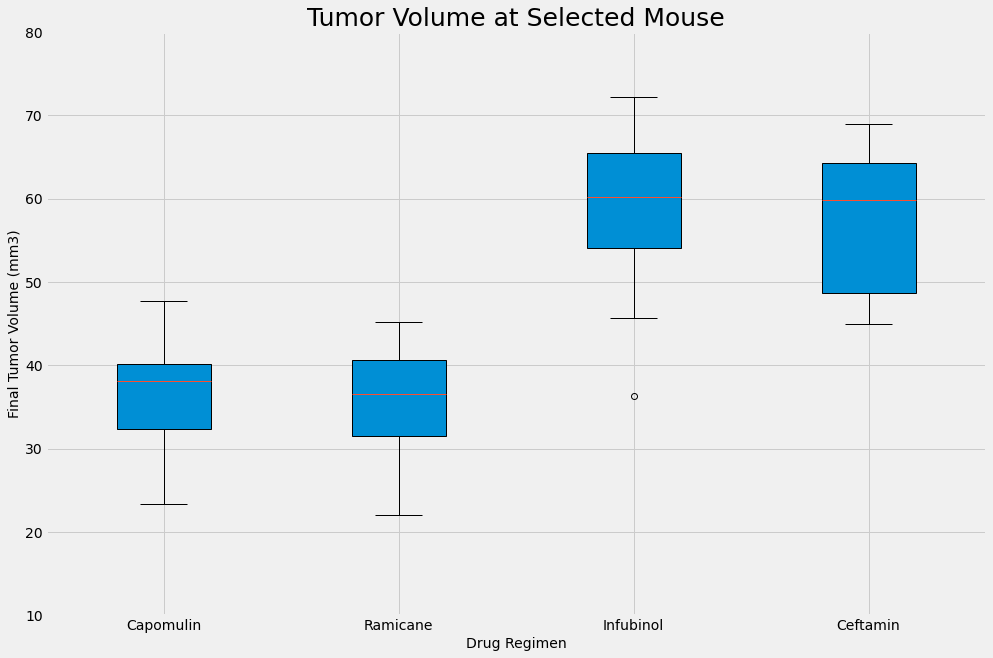

In [360]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
plt.style.use("fivethirtyeight")

# Capomulin, Ramicane, Infubinol, and Ceftamin dataframes
Capomulin_df = study_combined_complete.loc[study_combined_complete["Drug Regimen"] == "Capomulin",:]
Ramicane_df = study_combined_complete.loc[study_combined_complete["Drug Regimen"] == "Ramicane", :]
Infubinol_df = study_combined_complete.loc[study_combined_complete["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = study_combined_complete.loc[study_combined_complete["Drug Regimen"] == "Ceftamin", :]

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, study_combined_complete, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, study_combined_complete, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head(500)

# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)




#Ramicaine
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, study_combined_complete, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")

Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)




## Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, study_combined_complete, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq




lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)



Infubinol_merge.to_csv("output.csv")


# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, study_combined_complete, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()


# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


#BOXPLOT
plt.style.use("fivethirtyeight")
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.show()



# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [331]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 





    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

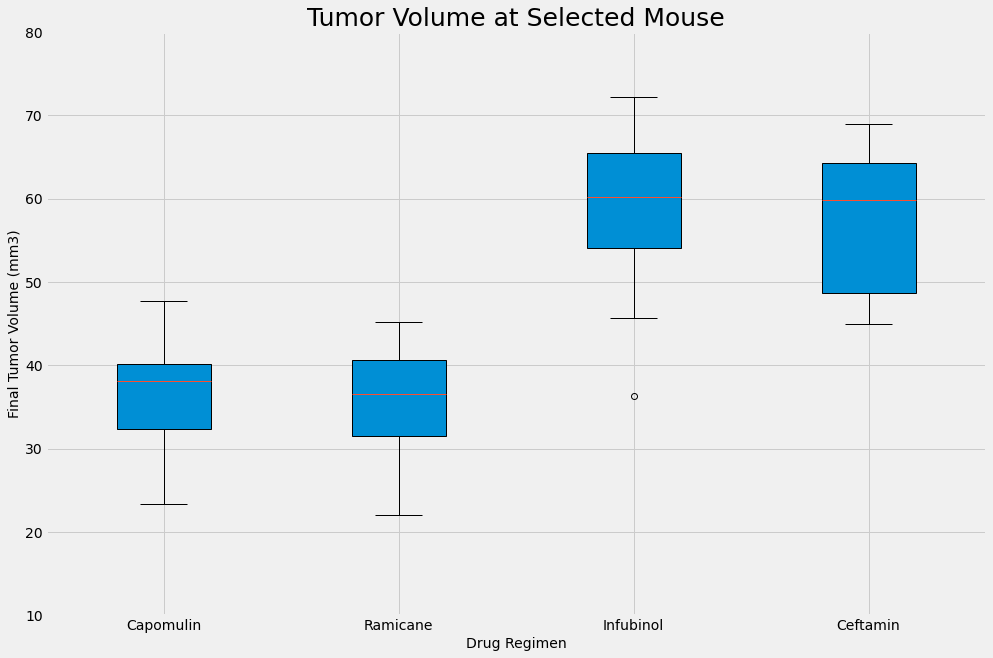

In [345]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

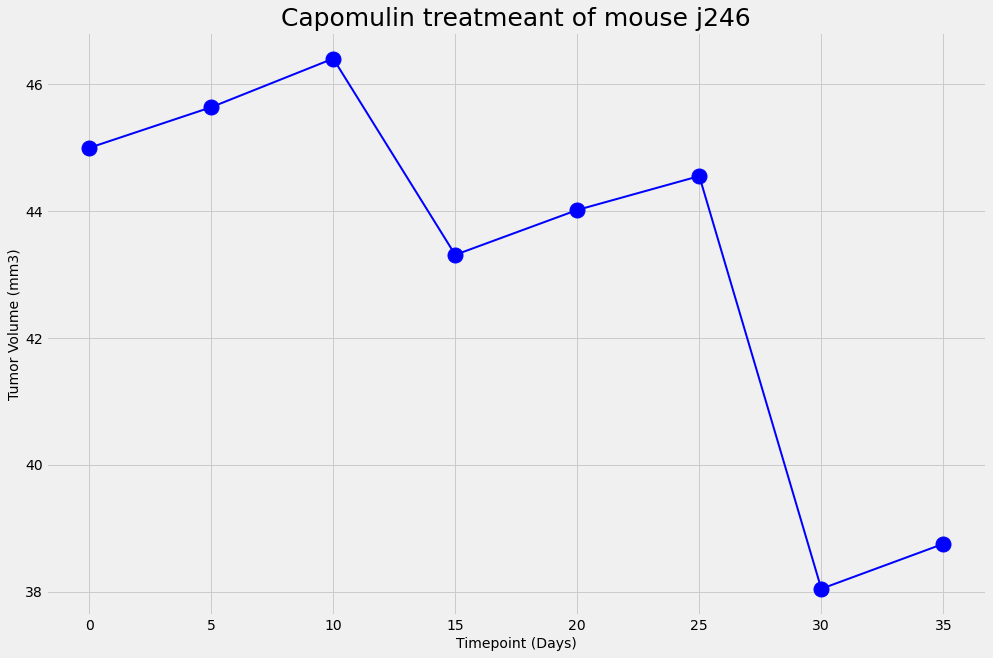

In [364]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.style.use("fivethirtyeight")


lineplot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "j246",:]

x_axis = lineplot_df["Timepoint"]
tumsiz = lineplot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse j246',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.show()

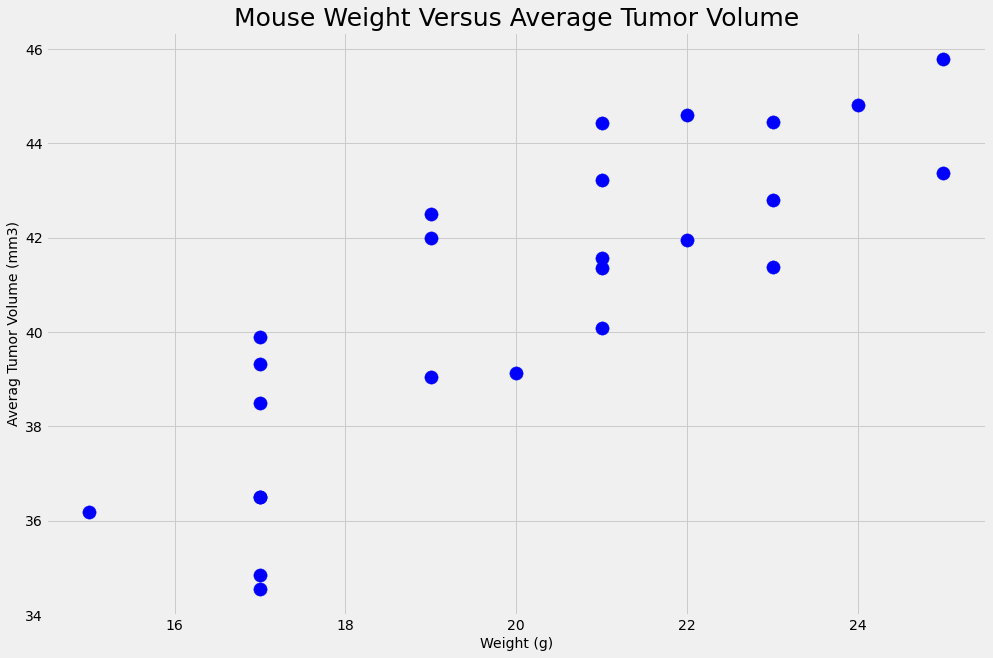

In [353]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=20
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


plt.show()

## Correlation and Regression

In [365]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


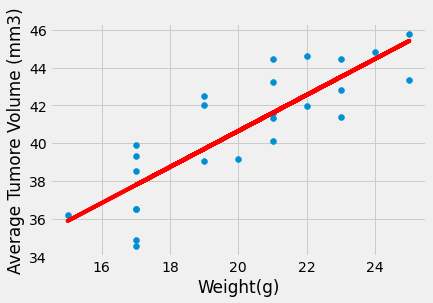

In [378]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

#slope and intercept
mslope = 0.9544396890241045
bintercept = 21.552160532685015


model=st.linregress(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])

y_values = avg_capm_vol['Weight (g)']*mslope+bintercept
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
plt.plot(avg_capm_vol['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')




plt.savefig('linearregression')
plt.show()